In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [2]:
df = pd.read_csv('../../data/01-modified-data/race_result_cleaned.csv')

In [3]:
df.head()

,Unnamed: 0,circuitId,season,round,raceName,date,circuitName,Location,Driver_Position,Driver_Points,driverRef,constructorRef,grid_pos,completed_laps,race_status,race_time
0,0,silverstone,1950,1,British Grand Prix,1950-05-13,Silverstone Circuit,"{'lat': '52.0786', 'long': '-1.01694', 'locali...",1.0,9.0,'farina','alfa',1.0,70.0,'Finished',"{'millis': '8003600', 'time': '2:13:23.6'}}"
1,1,silverstone,1950,1,British Grand Prix,1950-05-13,Silverstone Circuit,"{'lat': '52.0786', 'long': '-1.01694', 'locali...",2.0,6.0,'fagioli','alfa',2.0,70.0,'Finished',"{'millis': '8006200', 'time': '+2.6'}}"
2,2,silverstone,1950,1,British Grand Prix,1950-05-13,Silverstone Circuit,"{'lat': '52.0786', 'long': '-1.01694', 'locali...",3.0,4.0,'reg_parnell','alfa',4.0,70.0,'Finished',"{'millis': '8055600', 'time': '+52.0'}}"
3,3,silverstone,1950,1,British Grand Prix,1950-05-13,Silverstone Circuit,"{'lat': '52.0786', 'long': '-1.01694', 'locali...",4.0,3.0,'cabantous','lago',6.0,68.0,'+2 Laps'},NaN
4,4,silverstone,1950,1,British Grand Prix,1950-05-13,Silverstone Circuit,"{'lat': '52.0786', 'long': '-1.01694', 'locali...",5.0,2.0,'rosier','lago',9.0,68.0,'+2 Laps'},NaN


In [49]:
win_count_df = df[df['Driver_Position'] == 1.0].groupby('driverRef', as_index=False)['Driver_Position'].count()
win_count_df.sort_values(by = 'Driver_Position', axis=0, ascending=False, inplace=True)
win_count_df_top10 = win_count_df.head(10)

max_points_df = df.groupby('driverRef', as_index=False)['Driver_Points'].sum()
max_points_df.sort_values(by = 'Driver_Points', axis=0, ascending=False, inplace=True)
max_points_df_top10 = max_points_df.head(10)

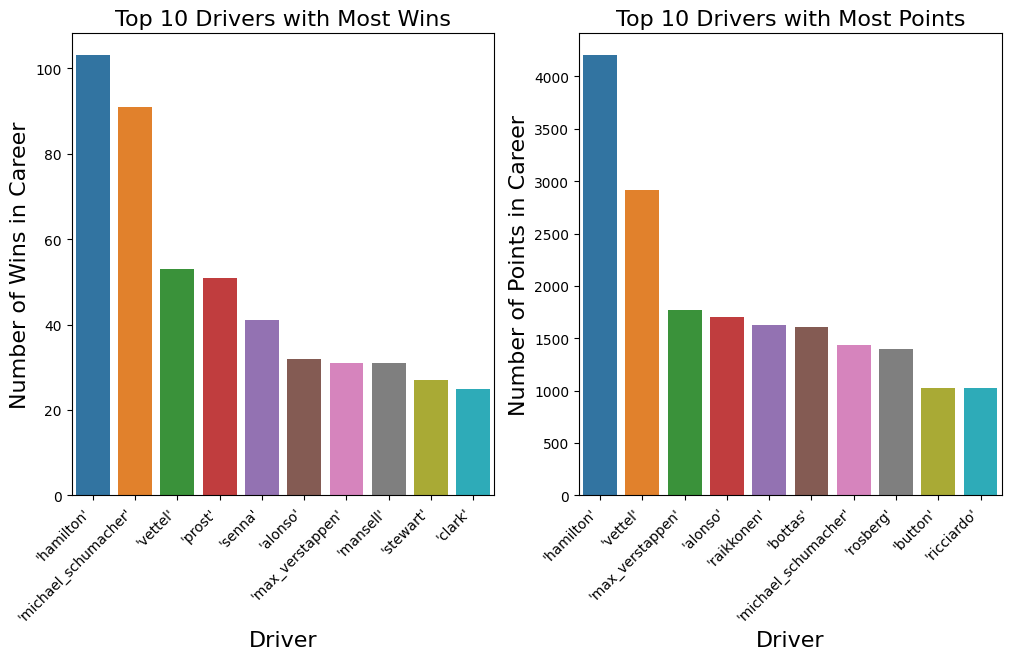

In [68]:
fig, ax = plt.subplots(nrows=1, ncols=2 ,figsize = (12, 6))

sns.barplot(x = win_count_df_top10['driverRef'], y = win_count_df_top10['Driver_Position'] , ax = ax[0])
sns.barplot(x = max_points_df_top10['driverRef'], y = max_points_df_top10['Driver_Points'], ax = ax[1])

FS = 16

ax[1].set_xlabel('Driver', fontsize=FS)
ax[1].set_ylabel('Number of Points in Career', fontsize=FS)
ax[1].set_title('Top 10 Drivers with Most Points', fontsize=FS)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment='right')

ax[0].set_xlabel('Driver', fontsize=FS)
ax[0].set_ylabel('Number of Wins in Career', fontsize=FS)
ax[0].set_title('Top 10 Drivers with Most Wins', fontsize=FS)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment='right')

plt.savefig('../../501-project-website/images/visualizations/main_data/top10_drivers_wins_points.png')
plt.show()

In [65]:
c_win_count_df = df[df['Driver_Position'] == 1.0].groupby('constructorRef', as_index=False)['Driver_Position'].count()
c_win_count_df.sort_values(by = 'Driver_Position', axis=0, ascending=False, inplace=True)
c_win_count_df_top10 = c_win_count_df.head(10)

c_max_points_df = df.groupby('constructorRef', as_index=False)['Driver_Points'].sum()
c_max_points_df.sort_values(by = 'Driver_Points', axis=0, ascending=False, inplace=True)
c_max_points_df_top10 = c_max_points_df.head(10)

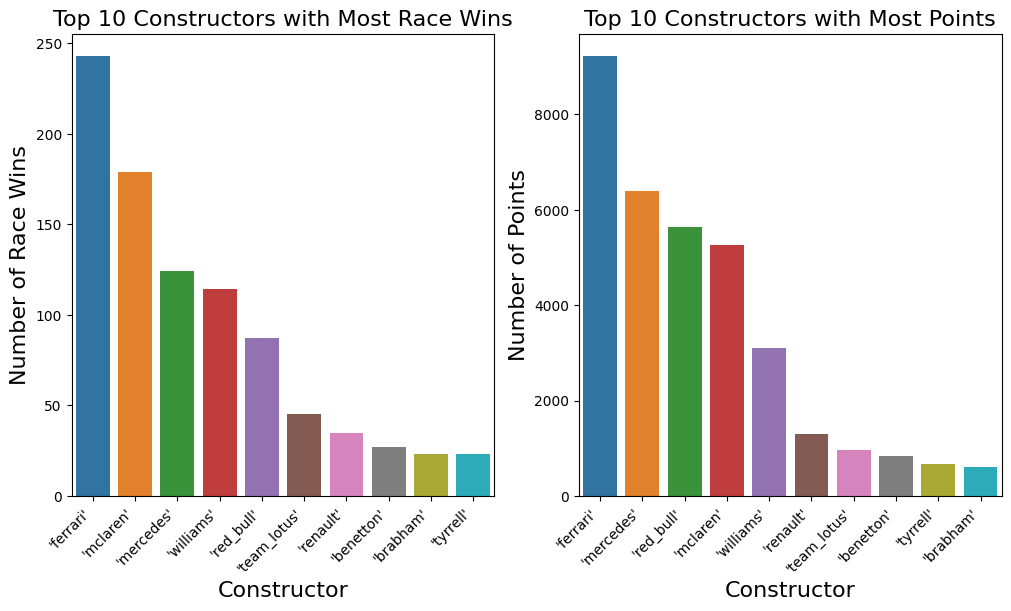

In [70]:
fig, ax = plt.subplots(nrows=1, ncols=2 ,figsize = (12, 6))

sns.barplot(x = c_win_count_df_top10['constructorRef'], y = c_win_count_df_top10['Driver_Position'], ax=ax[0])
sns.barplot(x = c_max_points_df_top10['constructorRef'], y = c_max_points_df_top10['Driver_Points'], ax=ax[1])

FS = 16
ax[1].set_xlabel('Constructor', fontsize=FS)
ax[1].set_ylabel('Number of Points', fontsize=FS)
ax[1].set_title('Top 10 Constructors with Most Points', fontsize=FS)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment='right')

ax[0].set_xlabel('Constructor', fontsize=FS)
ax[0].set_ylabel('Number of Race Wins', fontsize=FS)
ax[0].set_title('Top 10 Constructors with Most Race Wins', fontsize=FS)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment='right')

plt.savefig('../../501-project-website/images/visualizations/main_data/top10_constructor_wins_points.png')
plt.show()

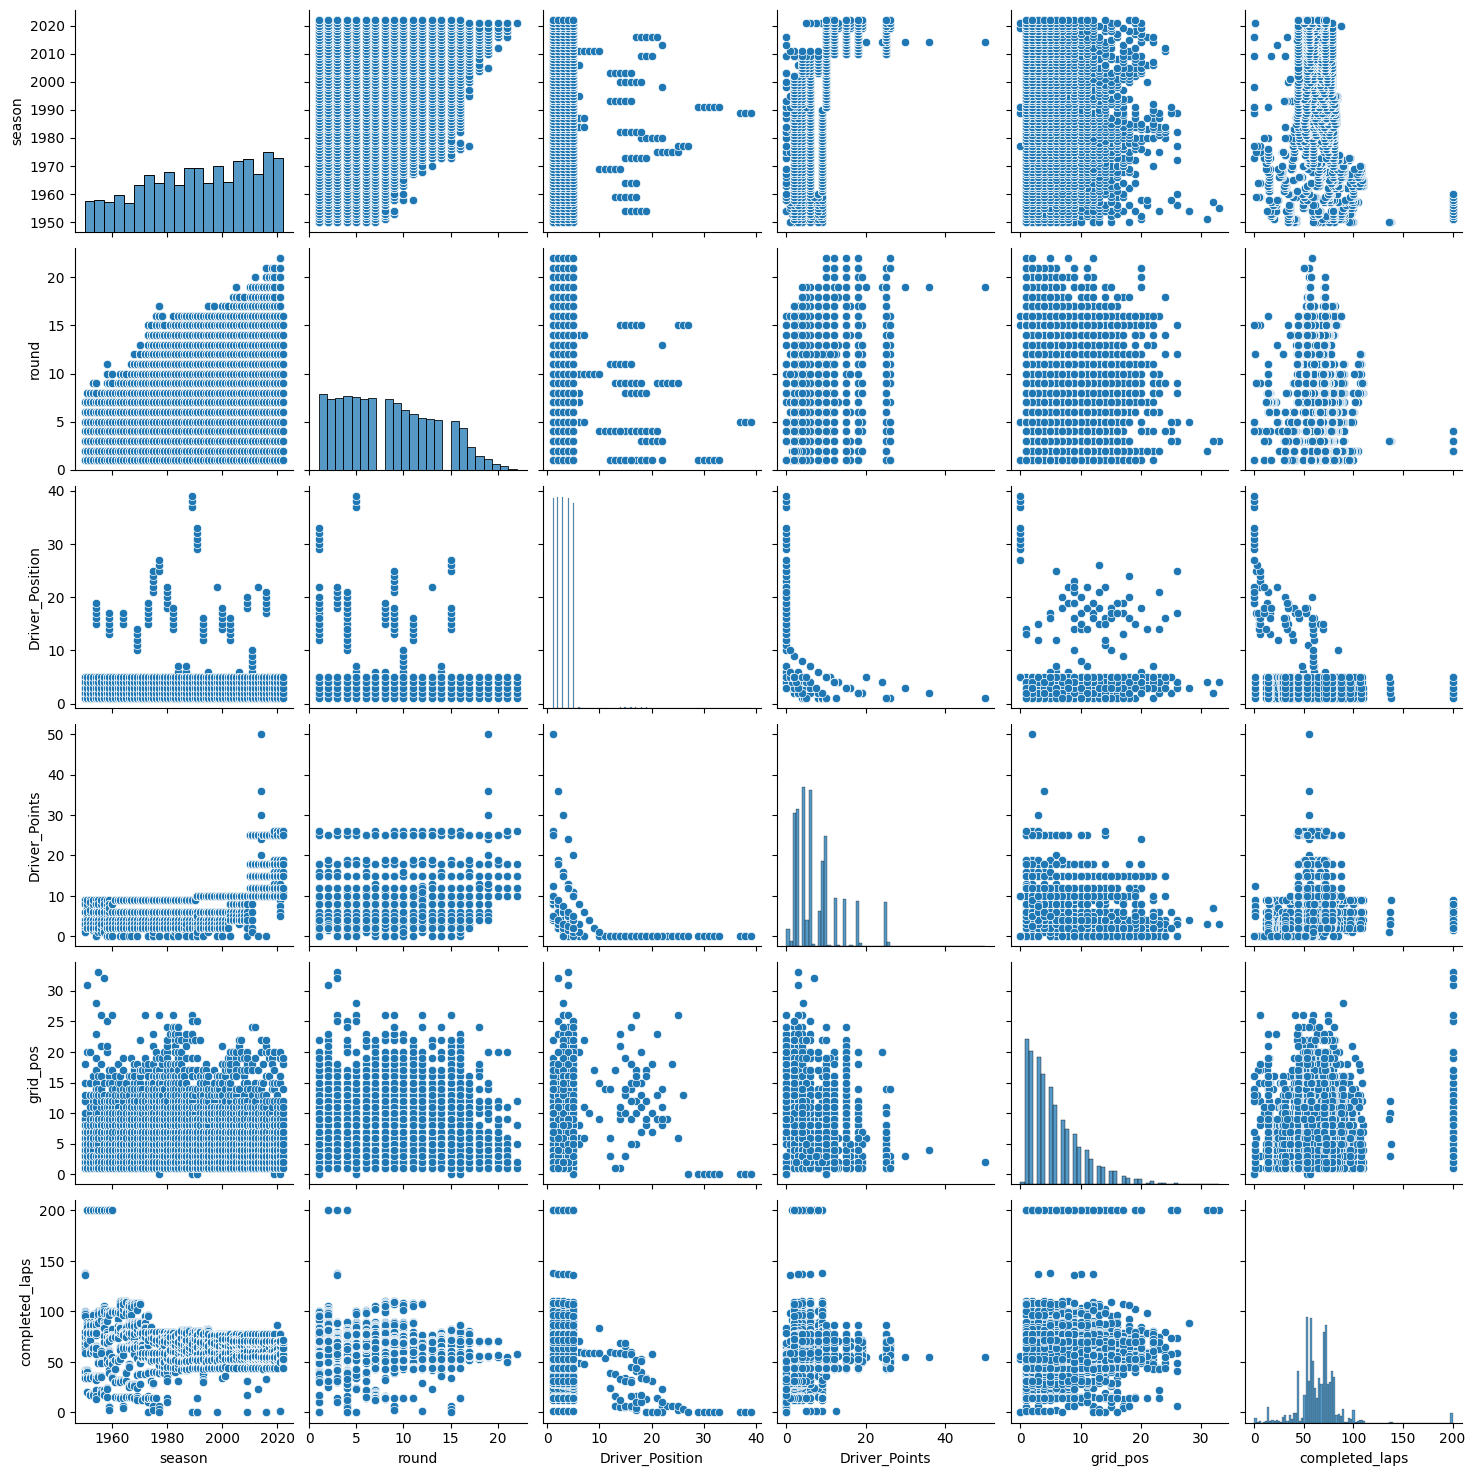

In [71]:
sns.pairplot(df)
plt.savefig('../../501-project-website/images/visualizations/main_data/pairplot.png')
plt.show()